___
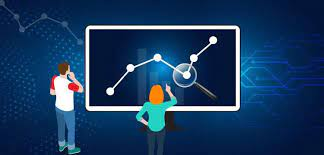


# <font color= #8A0829> Repaso conceptos principales de series de tiempo 2.</font>

<Strong> Objetivos </Strong>
- Revisión de los modelos clásicos más comúnmente utilizados para pronóstico de series de tiempo.
- Revisar las propiedas principales que deben de cumplir los modelos lineales para poder ser implementados en modelos de pronóstico.
> Referencias: 
    > - https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook
    > - https://www.projectpro.io/article/how-to-build-arima-model-in-python/544
    > - https://www.statsmodels.org/v0.13.0/examples/notebooks/generated/statespace_sarimax_stata.html
    > - [Lecture 6 part B: Identifying order of ARIMA models](https://www.youtube.com/watch?v=ZE_WGBe0_VU)
    > - https://analyzingalpha.com/interpret-arima-results
___

# Introducción

El análisis de autocorrelación es un paso importante en el análisis exploratorio de datos (EDA) de series temporales. El análisis de autocorrelación ayuda a detectar patrones ocultos y estacionalidad y a verificar la aleatoriedad. Es especialmente importante cuando pretende utilizar un **modelo ARIMA** para realizar pronósticos, porque el análisis de autocorrelación ayuda a identificar los **parámetros AR y MA** para el modelo ARIMA.

"Para medir la eficacia de los modelos de *deep learning*, tendremos que compararlos con los modelos tradicionales (lineales)". Por esta razón esta clase se enfocará en realizar una implementación de los modelos lineales clásicos y su implementación en python.

# Fundamentos

## Auto-Regressive and Moving Average Models

### 1. Auto-Regressive (AR) Model

$$\hat{y}_t = \alpha_0 + \alpha_1 y_{t-1} + \dots + {\alpha_p}y_{t-p} + \epsilon_t$$

donde $|\alpha_i| \leq 1$ para $i=1,\cdots, p$ y Epsilon ($\epsilon_t$) indica el ruido blanco. El modelo AR asume que el valor actual ($y_t$) **depende de los valores anteriores** ($y_{t-1}, y_{t-2}, y_{t-3},...$). Debido a esta suposición, podemos construir un modelo de regresión **lineal**.

Para averiguar el orden de un modelo AR, se usaría la gráfica de **Partial Autocorrelation Function (PACF)**. Dado que hay p valores pasados, esto se denota como AR(p) o un modelo autorregresivo del orden $p$.

### 2. Moving Average (MA) Model

$$\hat{y}_t = \beta_0 + \beta_1 \epsilon_{t-1} + \dots + \beta_{q} \epsilon_{t-q} + \epsilon_t $$

donde $|\beta_i| \leq 1$ para $i=1,\cdots, q$ y Epsilon ($\epsilon_t$) indica el ruido blanco. El modelo MA asume que el valor actual ($y_t$) **depende de los términos de error**, incluído el error actual ($\epsilon_{t}, \epsilon_{t-1}, \epsilon_{t-2}, \epsilon_{t-3},...$). Debido a que los términos de error son aleatorios, no existe una relación **lineal** entre el valor actual y los términos de error.

Para averiguar el orden de un modelo MA, usaría la gráfica de **Autocorrelation Function (ACF)**. Por lo tanto, el modelo anterior se puede denotar de forma independiente como una media móvil de orden $q$ o simplemente MA(q).

**Métodos para seleccionar los valores de (p, q)**

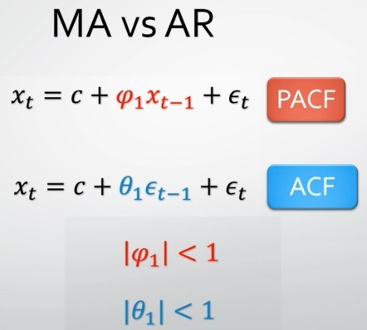

### 3. Auto-Regressive Moving Average (ARMA) Model
No es más que una combinación de los modelos AR y MA, es decir, es un modelo que contiene ambos enfoques, el autoagresivo y el de medias móviles. También es usualmente llamado modelo Box-Jenkins
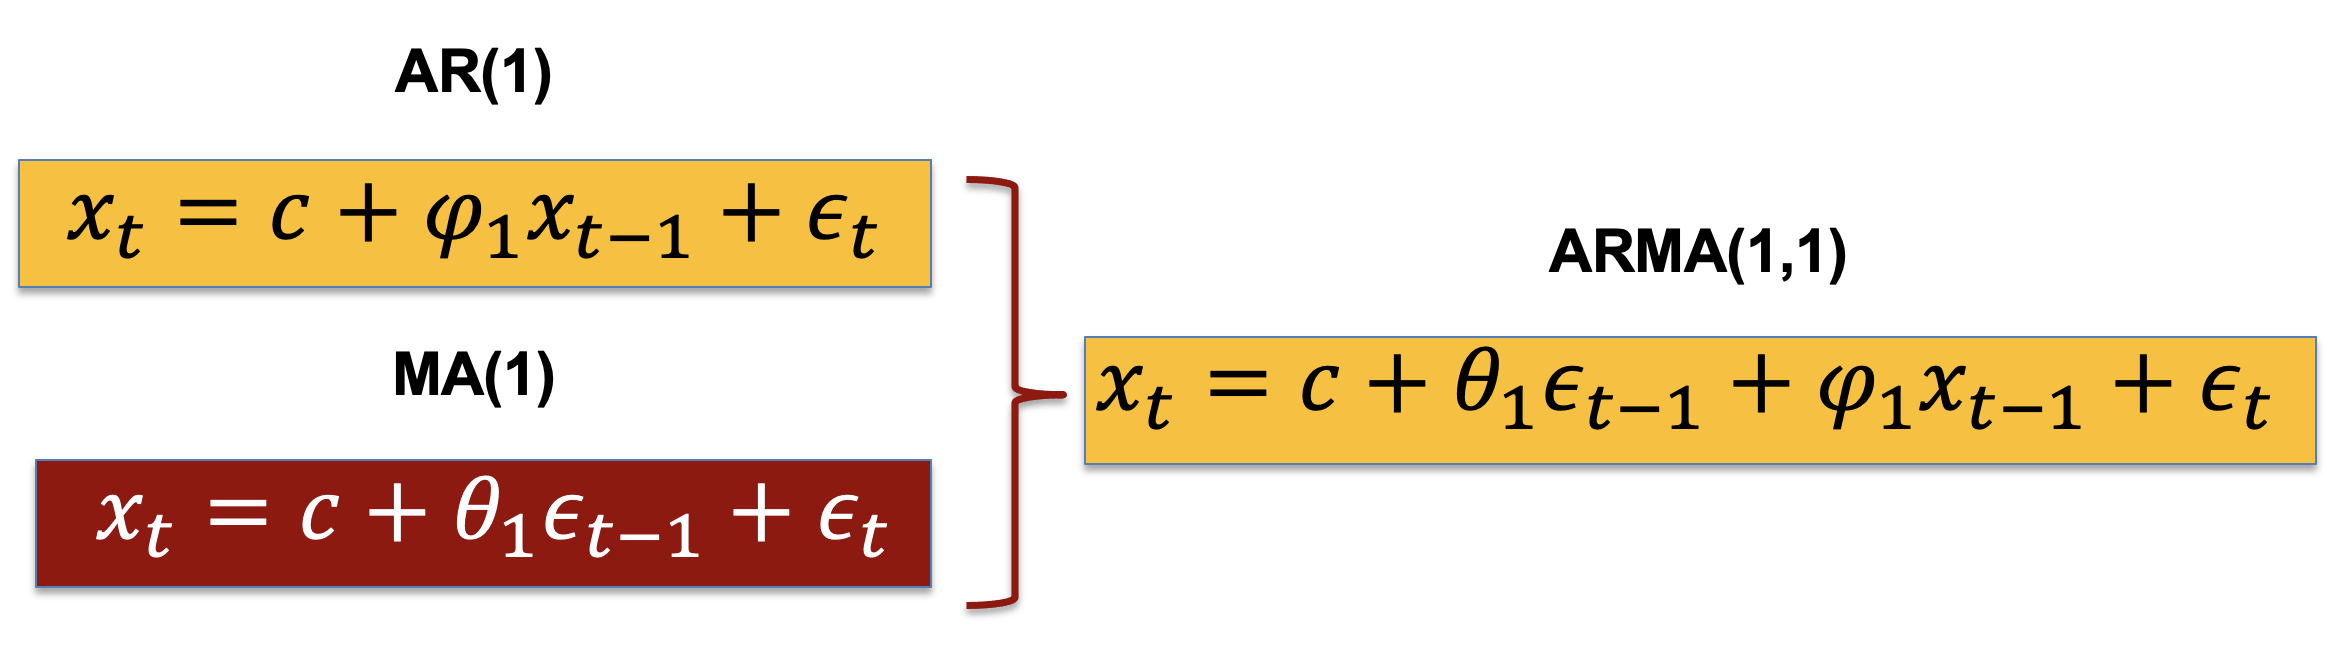

En general un modelo $ARMA(p,q)$ se puede describir con la siguiente ecuación general:
$$
\hat{y}_t = c + \sum_{i=1}^p \alpha_i y_{t-i} + \sum_{i=1}^q\beta_i \epsilon_{t-i} + \epsilon_t
$$

Lo que normalmente se hace para elegir este modelo es empezar un modelo de orden alto (sobreparametrizado) e ir reduciendo sus órdenes p y q. Para decidir donde parar de reducir de orden se observa lo siguiente:

|       **Valor**       |       **Significado del valor**      |       **Valor deseado**       |
|:---------------------:|:------------------------------------:|:-----------------------------:|
|     Log Likelihood    |     Logaritmo de la verosimilitud    |     Entre más grande mejor    |
|           AIC         |      Akaike Information Criteria     |      Entre más bajo mejor     |
|           BIC         |     Bayesian Information Criteria    |      Entre más bajo mejor     |

### 4. Auto-Regressive Integrated Moving Average (ARIMA) Model
Los retrasos de la serie estacionaria en la ecuación de pronóstico se denominan términos 'autoregresivos', los retrasos de los errores de pronóstico se denominan términos de 'promedio móvil', y una serie de tiempo que necesita diferenciarse para volverse estacionaria se dice que es un término 'integrado'. versión de una serie estacionaria. 

ARIMA utiliza la diferenciación para hacer que los datos sean estacionarios. La diferenciación, en su forma más simple, implica tomar la diferencia de dos puntos de datos adyacentes. Este cambio puede ser modelado de la siguiente forma:

Definiendo el operador Lag como $L^jy_t = y_{t-j}$ asumiendo una diferencia de orden uno ($d=1$) tenemos:
$$
\begin{aligned}
    \Delta y_t &= y_t - y_{t-1} \\
    & = y_t - L y_t = (1-L)y_t
\end{aligned}
$$
Múltiples iteraciones de diferenciación pueden ayudar más hasta cierto punto si es necesario. Diferenciar los datos d veces crea datos diferenciados de orden d. Si $d=2$, tendríamos
$$
\begin{aligned}
    \Delta^2 y_t &= \Delta y_t - \Delta y_{t-1} \\
    & = (y_t-y_{t-1})-(y_{t-1}-y_{t-2})\\
    & = y_t - 2y_{t-1}+y_{t-2} = (1 - 2L + L^2)y_t = (1-L)^2y_t
\end{aligned}
$$
Vemos que se establece aquí una generalidad. Por lo tanto, una serie diferenciada de orden d se definiría como:
$$
\begin{aligned}
    \Delta^d y_t &= (1-L)^d y_t
\end{aligned}
$$
Finalmente, el modelo ARIMA sería como sigue
$$
\Delta^d y_t = c + \sum_{i=1}^p \alpha_i \Delta^d y_{t-i} + \sum_{i=1}^q\beta_i \epsilon_{t-i} + \epsilon_t
$$

En lo que respecta a los parámetros $c$, $\alpha_i$ y $\beta_i$, se actualizan utilizando la estimación de máxima verosimilitud (MLE), al igual que en la regresión lineal.

### ¿Cómo elegir los parámetros del modelo ARIMA?

Existen múltiples enfoques para establecer los parámetros ARIMA, ya que se pueden determinar observando las propiedades de los datos o empíricamente ajustando el modelo y evaluando el rendimiento. Examinaremos más a fondo los gráficos de:
- **Función de autocorrelación (ACF)**$\longrightarrow$orden del modelo MA(q),
- **Función de autocorrelación parcial (PACF)**$\longrightarrow$orden del modelo AR(p), 

para identificar la correlación general en los datos. Además, se puede emplear el cálculo de la media móvil y la desviación estándar o las pruebas existentes, como la prueba **Dickey Fuller** aumentada o ADF, para determinar las propiedades de la serie temporal. 

## Autocorrelación
Según lo que se ha aprendido hasta ahora, recordemos que en series temporales no podemos cambiar el orden de los datos, porque estos siguen un orden cronológico, además, también se pueden encontrar relaciones entre valores pasados y valores futuros.

Para entender la autocorrelación es importante entender primero la correlación. La correlación entre dos variables ‘x’ e ‘y’ se denota como:
$$corr(x,y)$$

y esta **da información acerca de cómo 2 series temporales cambian sus valores**. La autocorrelación por su parte sería la correlación entre una serie temporal y si misma:
$$corr(x_t,x_{t-k})$$

<span style="color:red">Mide el nivel de semejanza entre una secuencia de varios periodos atrás y los datos reales o actuales</span>. El número de periodos atrás es el valor de k en la expresión anterior, en pocas palabras, <span style="color:blue">describe la presencia o ausencia de correlación en los datos de las series temporales, indicando si las observaciones pasadas influyen en las actuales</span>.

En series temporales es vital poder calcular valores de autocorrelación, la cual se puede hacer mediante la función de autocorrelación y la función de autocorrelación parcial, ACF y PACF por sus siglas en inglés.

### a). La función de autocorrelación (ACF)
- Mide la correlación entre dos variables separadas por k periodos.
- Mide el grado de asociación lineal que existe entre dos variables del mismo proceso estocástico.

La función ACF es usada para identificar el proceso de media móvil (MA) en un modelo ARIMA.

Usaremos la función `plot_acf` de la biblioteca `statsmodels.graphics.tsaplots`. (Ver [statsmodels.tsa.stattools.acf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.acf.html))

El gráfico ACF puede proporcionar respuestas a las siguientes preguntas:
- ¿La serie de tiempo observada es **ruido blanco/aleatorio**?
- ¿Está una observación relacionada con una observación adyacente, una observación eliminada dos veces, etc.?
- ¿Se puede modelar la serie temporal observada con un **modelo MA**? En caso afirmativo, ¿cuál es el orden?

Una gráfica de ACF tiene la siguiente forma:
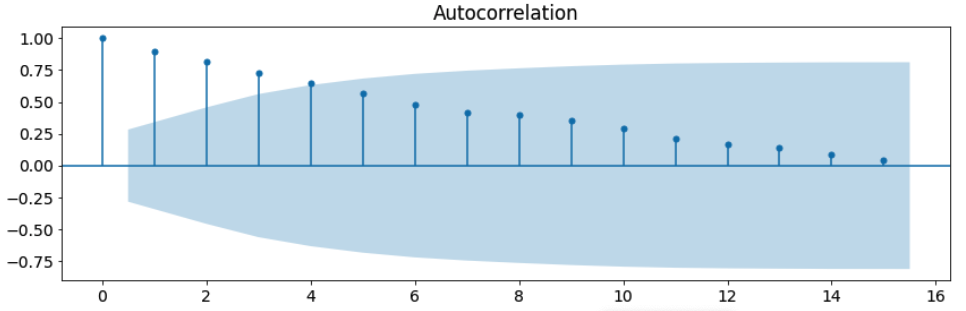

Para esta figura se utilizaron 15 lags, lo cual quiere decir que se analizaron hasta 15 periodos atrás de la serie, los valores del eje y, que son la autocorrelación, puede tomar valores entre-1 y 1 lo cual indica que puede ver autocorrelación positiva o negativa. **El área azul alrededor del eje x representa la significancia de los valores de autocorrelación**, lo cual sugiere la existencia de autocorrelación para ese retraso específico, veamos que el área se hace más grande, ya que a más distancia en el tiempo más improbable es que la correlación persista. Si las líneas son más altas que el área azul, se sugiere que existen relación entre los datos.

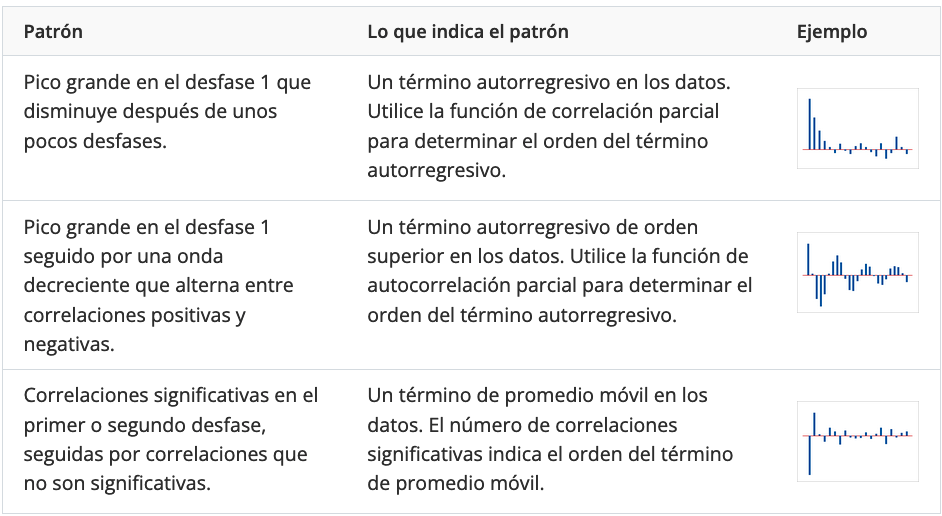

> **ACF**: En términos simples, describe qué tan bien se relaciona el valor presente de la serie con sus valores pasados.

## b). La función de autocorrelación parcial (PACF)
- Mide la correlación entre dos variables separadas por k periodos cuando **no se considera la dependencia creada por los retardos intermedios existentes entre ambas**.
- La autocorrelación parcial en el retraso k es la autocorrelación entre $X_t$ y $X_{t−k}$ que no se explica por los retrasos 1 a $k−1$.
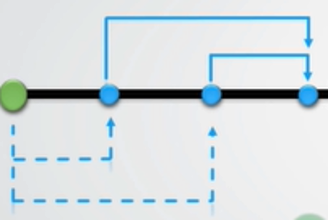

Usaremos la función `plot_pacf` de la biblioteca `statsmodels.graphics.tsaplots` con el parámetro `method = 'ols'` (regresión de series de tiempo en retrasos y en constante). (Ver [statsmodels.tsa.stattools.pacf](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.pacf.html))

**Nota**: el parámetro predeterminado para `método` es `yw` (Yule-Walker con ajuste de tamaño de muestra en el denominador para acovf). Sin embargo, este valor predeterminado está provocando **algunas autocorrelaciones inverosímiles superiores a 1** en los datos de muestra. Por lo tanto, cambiamos el parámetro `method` a uno que no esté causando este problema. `ywmle` también funcionaría bien como se sugiere en esta [publicación de StackExchange](https://stats.stackexchange.com/questions/380196/what-do-very-high-pacf-values-10-mean)

El cálculo de la correlación parcial es más complejo y existen varios métodos que lo realizan, entre los cuales están:
- ywunbiased: yule walker con corrección de sesgo en el denominador.
- ywmle: yule walker sin corrección de sesgo
- **ols: (ordinary least square) mínimos cuadrados ordinarios.**

El gráfico PACF puede proporcionar respuestas a las siguientes preguntas:
- ¿Se puede modelar la serie temporal observada con un **modelo AR**? En caso afirmativo, ¿cuál es el orden?

Una gráfica de PACF tiene la siguiente forma:

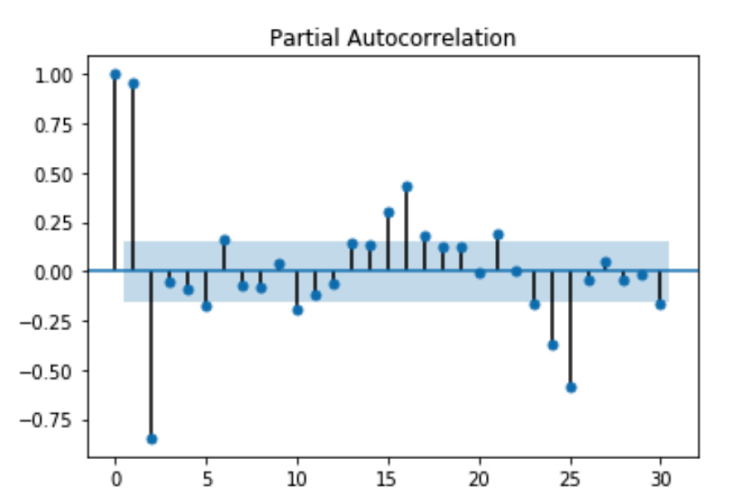

### ACF y PACF asumen la estacionariedad de la serie de tiempo subyacente.

>**Nota**:
>Los datos deben ser estacionarios antes de que usted interprete la gráfica de autocorrelación. Una serie de tiempo estacionaria tiene una media, una varianza y una función de autocorrelación que son esencialmente constantes a través del tiempo

#### Tabla para identificación de modelos ARMA

| | AR(𝑝) | MA(𝑞) | ARMA(𝑝, 𝑞) | 
|-|-|-|-| 
|ACF|Damped exponential and/or sine functions | Significant at lag 𝑞 / Cuts off after lag 𝑞|Damped exponential and/or sine functions after lag max(0, q − p)| 
|PACF| Significant at each lag 𝑝 / Cuts off after lag 𝑝|Dominated by damped exponential and/or sine functions |Damped exponential and/or sine functions after lag max(0, p-q)|

### Ejemplos:

Cuales serían las estructuras adecuadas para los siguientes ejemplos:
#### 1)
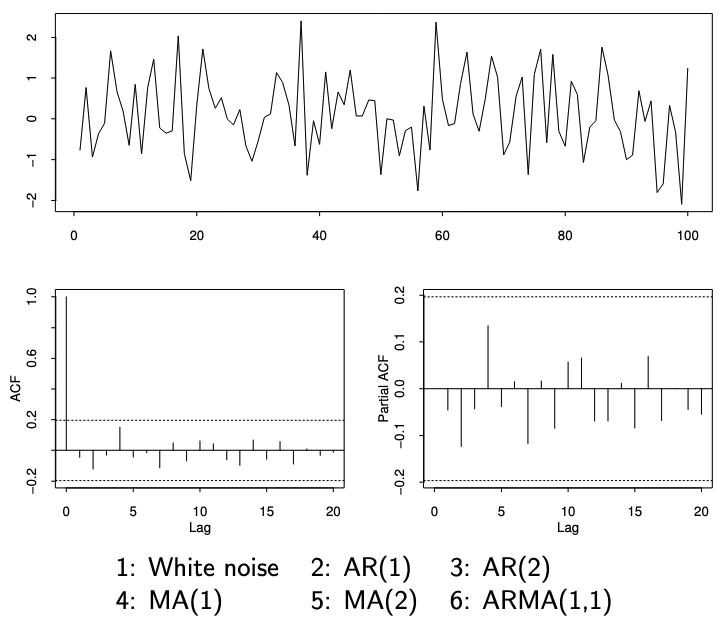

#### 2)
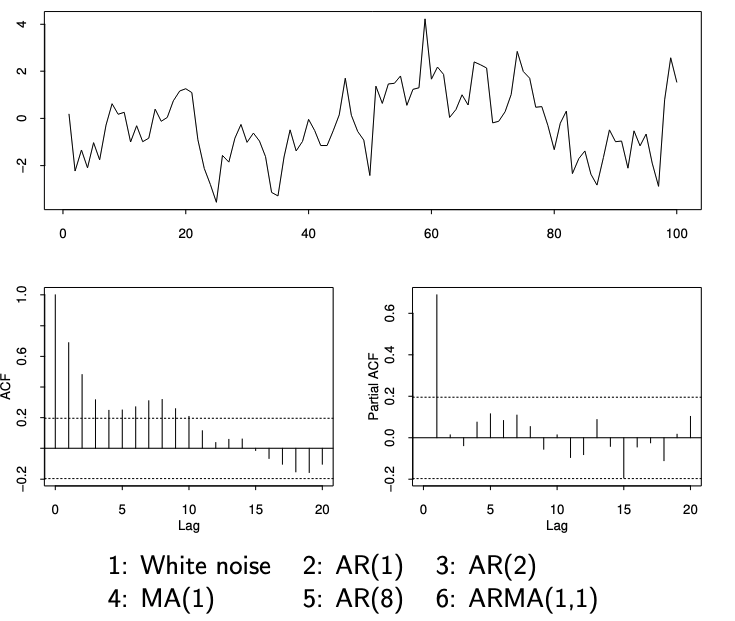

#### 3) 
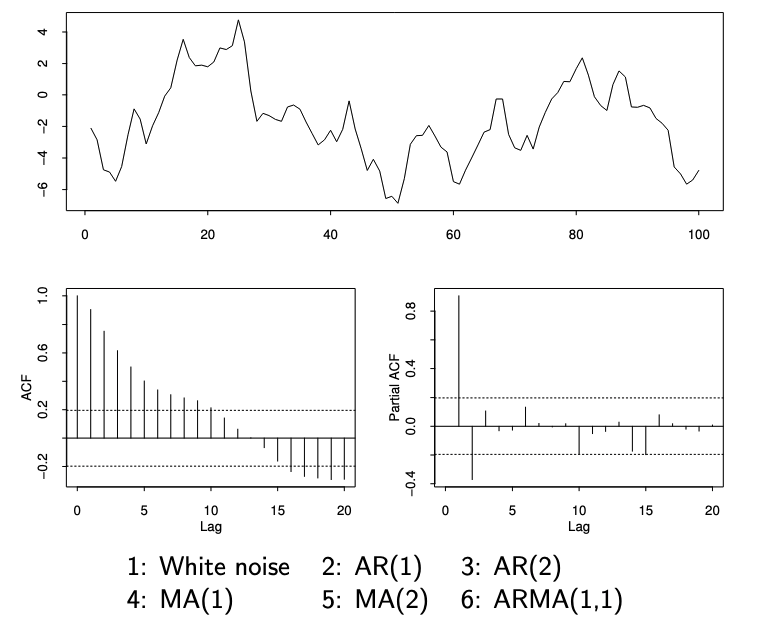

#### 4) 
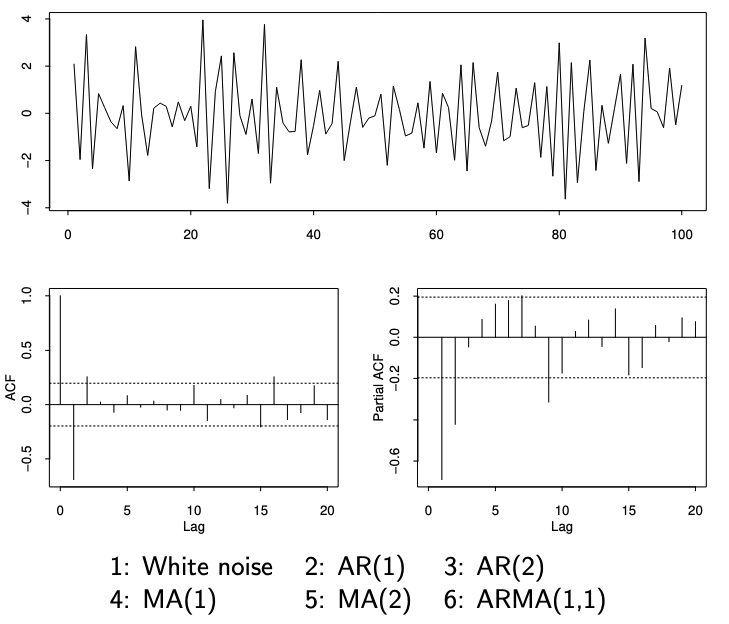

#### 5)
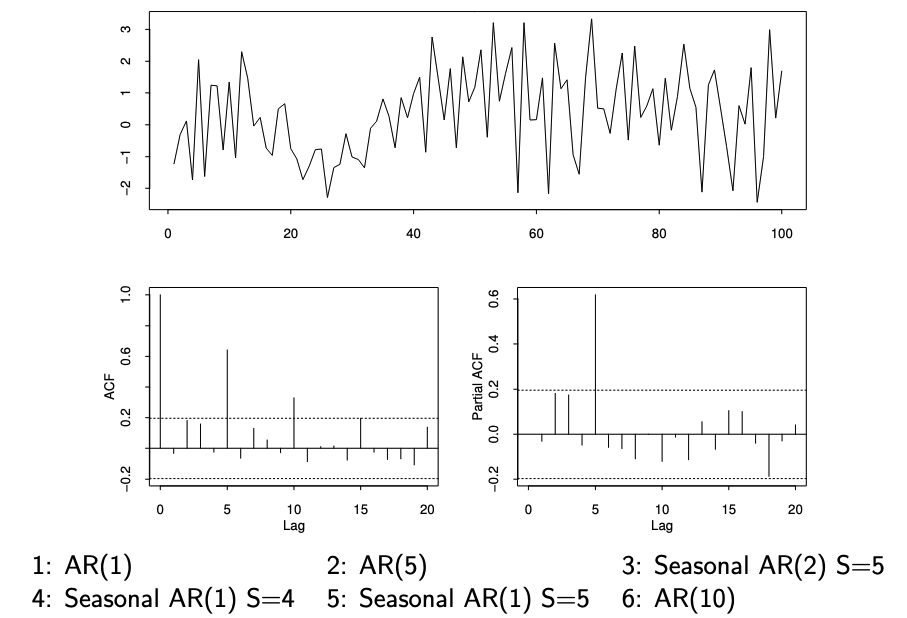

#### 6)-a) 
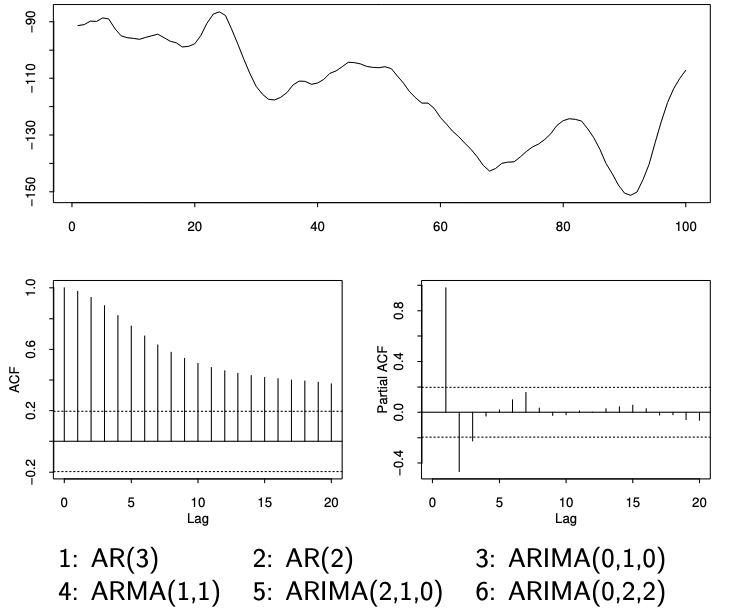

#### 6)-b) Misma serie, pero en esta ocasión analizando $\Delta y_t= (1-L)y_t= y_t - y_{t-1}$ 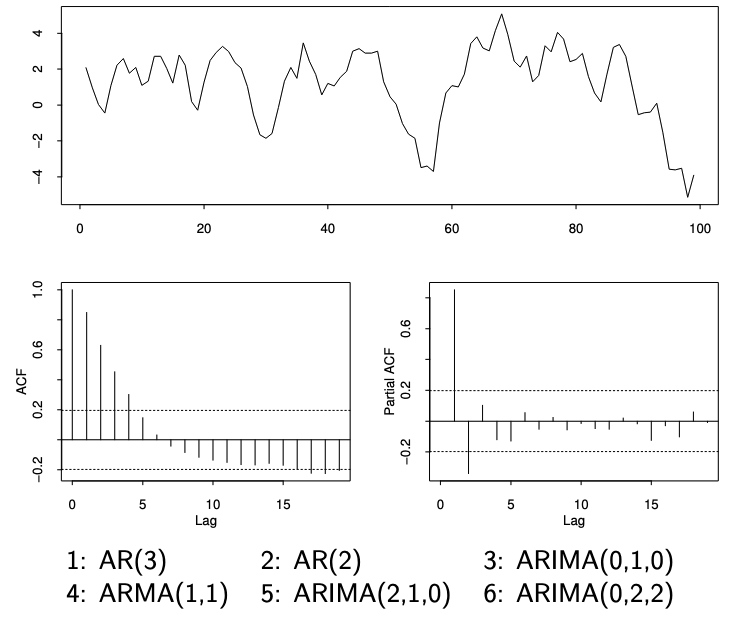

Con esto en mente podemos concluir lo siguiente:
1. Si este método falla para identificar (p, q) es por que el sistema bajo análisis no es un proceso estándar de AR, MA o ARMA.
2. Se debe intentar alguna otra herramienta o algoritmo.
3. Se puede considerar realizar transformaciones de la serie de tiempo. Típicamente se usan sqrt, log, square, inverse, etc.

## Respuestas:
    1). 1.
    2). 2.
    3). 3.
    4). 5.
    5). 5.
    6). 5.

# Implementación en python de un modelo ARIMA

Trabajaremos con el conjunto de datos de series temporales WWWUsage para mantener las cosas simples y visualmente intuitivas. WWWUsage.csv contiene 100 minutos de información y cada fila representa la cantidad de usuarios conectados al servidor en ese minuto.

In [3]:
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
import pandas as pd

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# plt.rc("figure", figsize=(11,8))
plt.rc("font", size=12)

In [5]:
data = pd.read_csv('datasets/WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data

,values
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226
99,222


<Axes: >

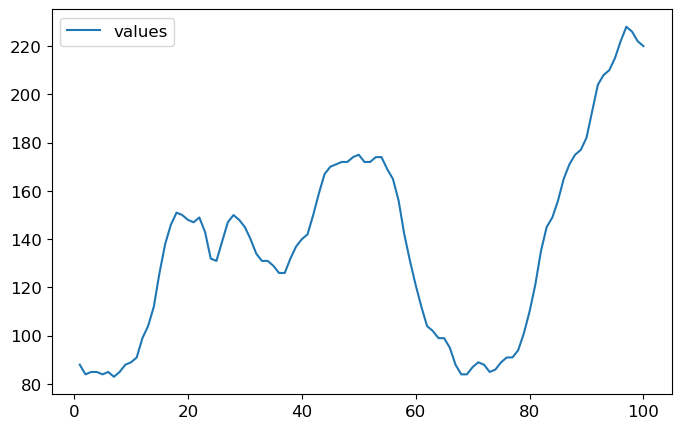

In [6]:
data.plot(figsize=(8,5))

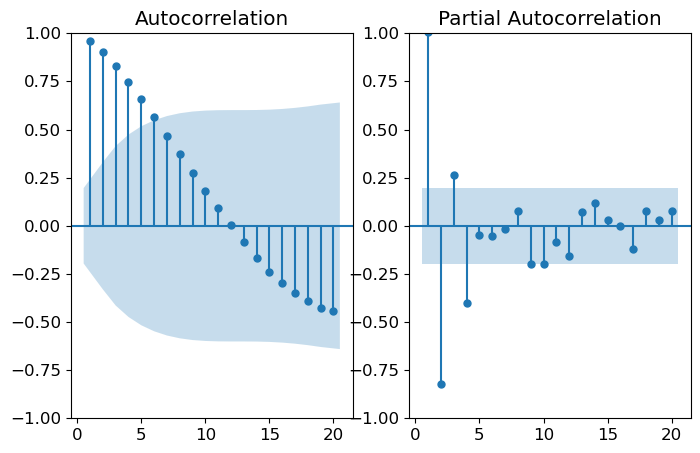

In [8]:
# Escoger parámetros de ARIMA

# 1. Graficar ACF y PACF
f = plt.figure(figsize=(8,5))

ax1 = f.add_subplot(121)

plot_acf(data, ax=ax1, zero=False, lags=20)

ax2 = f.add_subplot(122)
plot_pacf(data, ax=ax2, zero=False, method='ols')

plt.show()

Con los datos cómo los tenemos podemos confiarnos de los resultados arrojados por ACF y PACF?

Que nos falta hacer...

In [9]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [10]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Tratemos de volver estacionario nuestra serie de tiempo (differencing).

In [11]:
# Ilustración del método differencing con pandas
ilustracion = pd.DataFrame()

ilustracion['real'] = data
ilustracion['1d'] = data.diff()
ilustracion['p=2'] = data.diff(periods=2)
ilustracion['2d'] = data.diff().diff()

ilustracion

,real,1d,p=2,2d
1,88,NaN,NaN,NaN
2,84,-4.0,NaN,NaN
3,85,1.0,-3.0,5.0
4,85,0.0,1.0,-1.0
5,84,-1.0,-1.0,-1.0
...,...,...,...,...
96,222,7.0,12.0,2.0
97,228,6.0,13.0,-1.0
98,226,-2.0,4.0,-8.0
99,222,-4.0,-6.0,-2.0


In [12]:
diff1_values = data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)


ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


Concluir y comentar posibles acciones!

Realizamos nuevamente las gráficas de ACF y PACF para los datos estacionarios elegidos anteriormente para calcular $p$ y $q$.

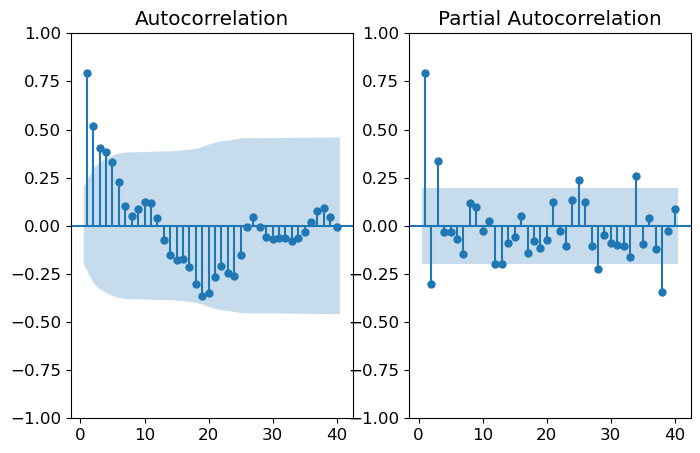

In [13]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

plot_acf_pacf(diff1_values, {'lags':40})

1. En base a la anterior gráfica enuncie los posibles valores de $p$, $d$ y $q$.

### ARIMA(p=3, d=1, q=4) ó ARIMA(p=3, d=1, q=0)

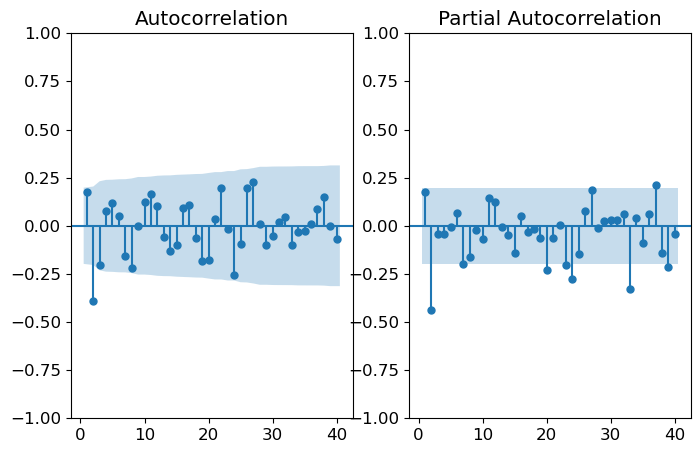

In [14]:
plot_acf_pacf(diff2_values, {'lags':40})

2. En base a la anterior gráfica enuncie los posibles valores de $p$, $d$ y $q$.

ARIMA(p=2, d=2, q=2)

**Escribir las ecuaciones finales en el tablero...**

In [15]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(data, order=(3, 1, 4))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -248.866
Date:                Tue, 04 Feb 2025   AIC                            513.731
Time:                        21:39:47   BIC                            534.492
Sample:                             0   HQIC                           522.131
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6150      0.148     10.902      0.000       1.325       1.905
ar.L2         -1.5354      0.174     -8.814      0.000      -1.877      -1.194
ar.L3          0.6229      0.139      4.471      0.0

In [16]:
# 2. Modelo de diferencia de segundo orden

# Basado en lo discutido anteriormente, necesitamos sólo considerar algunos términos AR y MA.
# Para ello definimos sus coeficientos cómo la especificación de polinomios

# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2 = ARIMA(data, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:             ARIMA([2], 2, [2])   Log Likelihood                -256.198
Date:                Tue, 04 Feb 2025   AIC                            518.396
Time:                        21:44:57   BIC                            526.151
Sample:                             0   HQIC                           521.532
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.2090      0.240     -0.870      0.384      -0.680       0.262
ma.L2         -0.2188      0.238     -0.918      0.359      -0.686       0.248
sigma2        10.8799      1.740      6.253      0.0

<Axes: >

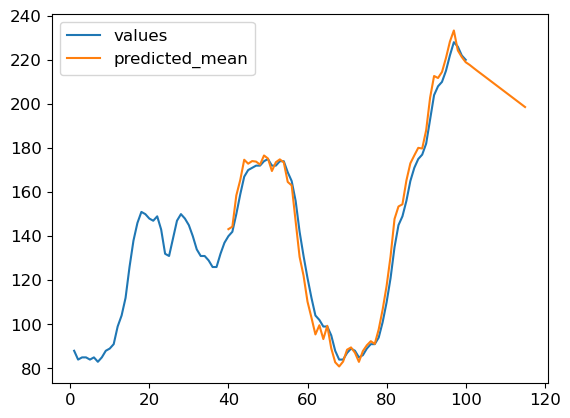

In [17]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model2.predict(start=40, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

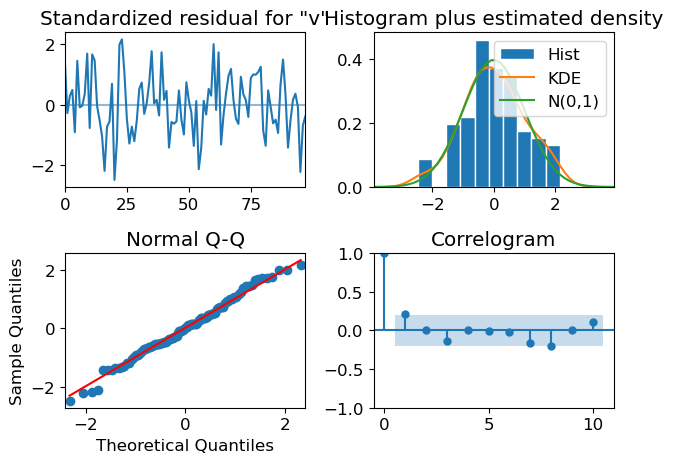

In [21]:
# Gráfico de los diagnósticos para los residuos
model2.plot_diagnostics()
plt.tight_layout();

## Interpretación de resultados

### 1. Significancia de los parámetros
Queremos asegurarnos de que cada término de nuestro modelo sea estadísticamente significativo. La hipótesis nula de esta sección es que cada coeficiente **NO es estadísticamente significativo**. Por lo tanto, queremos que cada término tenga un **valor de p menor que 0,05**, por lo que podemos rechazar la hipótesis nula con valores estadísticamente significativos.
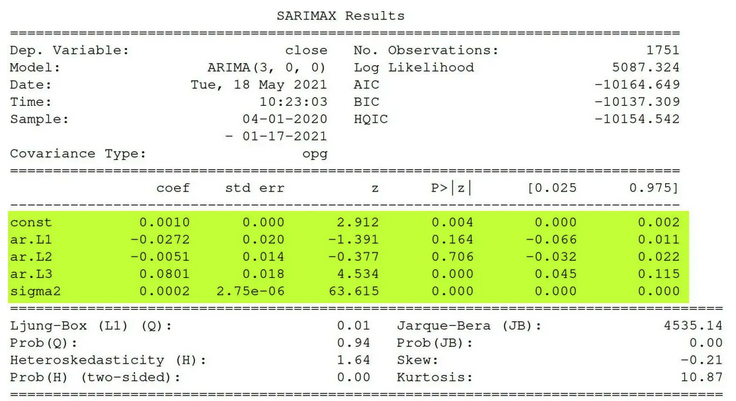

Para la imagen dada L1 y L2 no son estadísticamente significativos ya que sus p-values son mayores que 0.05 y no puedo rechazar la hipótesis nula.

### 2. Revisión de suposiciones
A continuación, queremos asegurarnos de que nuestro modelo cumpla con la **suposición de que los residuos son independientes**, lo que se conoce como ruido blanco.

Si los residuos no son independientes, podemos extraer la no aleatoriedad para hacer un mejor modelo.
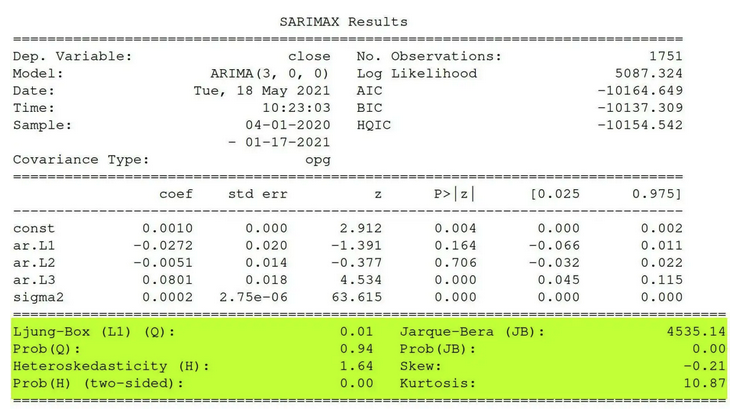

**Ljung-Box**

Es un tipo de prueba estadística de si un grupo cualquiera de autocorrelaciones de una serie de tiempo son diferentes de cero.

La prueba de Ljung-Box se puede definir de la siguiente manera.

- H0: **Los datos se distribuyen de forma independiente** (es decir, las correlaciones en la población de la que se toma la muestra son 0, de modo que cualquier correlación observada en los datos es el resultado de la aleatoriedad del proceso de muestreo).
- Ha: Los datos no se distribuyen de forma independiente.

El Ljung-Box (L1) (Q) es el estadístico de prueba LBQ en el desfase 1, el Prob(Q) es 0,01 y el valor-p es 0,94. Dado que la probabilidad está por encima de 0,05, no podemos rechazar la hipótesis nula entoces los datos se distribuyen de forma independiente.

**heterocedasticidad**

La heterocedasticidad prueba que los residuos de error son homocedásticos es decir tienen la misma varianza.
Comprueba si la suma de cuadrados en el primer tercio de la muestra es significativamente diferente de la suma de cuadrados en el último tercio de la muestra.
Esta prueba realiza las siguientes pruebas de hipótesis:
- H0: Los datos son homocedásticos.
- Ha: Los datos son heterocedásticos.

El resumen realiza la prueba de White. Nuestros estadísticos de resumen muestran una estadística de prueba de 1,64 y un valor-p de 0,00, lo que significa que rechazamos la hipótesis nula y nuestros residuos muestran varianza cambiante (heterocedásticos).

**Jarque-Bera**

La prueba de Jarque-Bera es una prueba de bondad de ajuste para comprobar si una muestra de datos tiene la asimetría y la curtosis de una distribución normal.

Pruebas de Jarque-Bera para la normalidad de los errores. Esta prueba realiza las siguientes pruebas de hipótesis:
- H0: **Los datos se distribuyen normalmente (asimetría=0 y curtosis=3)**
- Ha: Los datos no distribuyen normales.

En nuestro ejemplo, vemos un estadístico de prueba de 4535.14 con una probabilidad de 0, lo que significa que rechazamos la hipótesis nula y los datos no se distribuyen normalmente. Además, como parte de la prueba de Jarque-Bera, vemos que la distribución tiene una ligera asimetría negativa y una gran curtosis.

### 3.  Análisis de ajuste

Log-Likelihood, AIC, BIC y HQIC ayudan a comparar un modelo con otro.
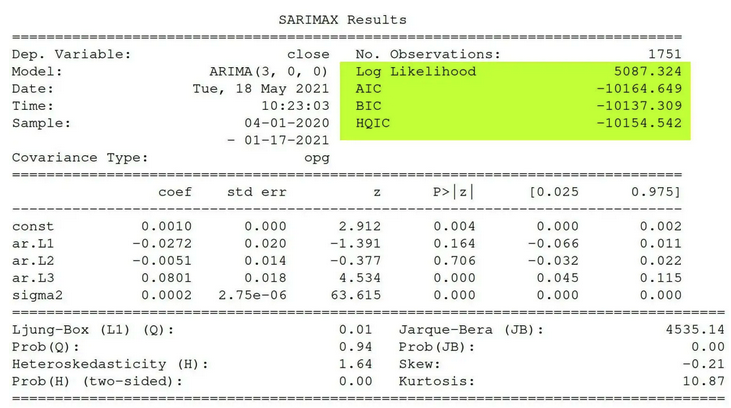

**Log-Likelihood**

La función de probabilidad logarítmica identifica una distribución que se ajusta mejor a los datos muestreados. Si bien es útil, AIC y BIC castigan el modelo por su complejidad, lo que ayuda a que nuestro modelo ARIMA sea parsimonioso. Entre más grande sea este valor mejor.

**Criterio de información de Akaike**

El criterio de información de Akaike (AIC) ayuda a determinar la fuerza del modelo de regresión lineal. El AIC penaliza a un modelo por agregar parámetros ya que agregar más parámetros siempre aumentará el valor de máxima verosimilitud. Entre más pequeño sea este valor mejor.

**Criterio de información bayesiano**

El Criterio de Información Bayesiano (BIC), al igual que el AIC, también castiga a un modelo por su complejidad, pero también incorpora el número de filas en los datos. Entre más pequeño sea este valor mejor.

> Referencia: https://analyzingalpha.com/interpret-arima-results

# <span style="color:red"> Tarea 2. </span>

Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el análisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos, cómo en la siguiente gráfica:
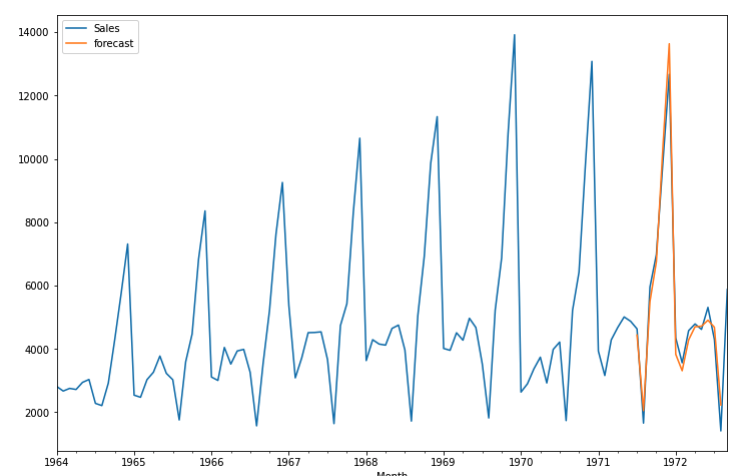

# Notas adicionales

- Conjunto de entrenamiento: Conjunto de ejemplos utilizados para el aprendizaje, es decir, para ajustarse a los parámetros del clasificador.

- Conjunto de validación: un conjunto de ejemplos utilizados para ajustar los parámetros de un clasificador, por ejemplo, para elegir el número de unidades ocultas en una red neuronal.

- Conjunto de prueba: un conjunto de ejemplos utilizados solo para evaluar el rendimiento de un clasificador completamente especificado.

> [Link](https://machinelearningmastery.com/difference-test-validation-datasets/)

## Ejemplos de modelos AR, MA y ARIMA usando el gráfico ACF y PACF
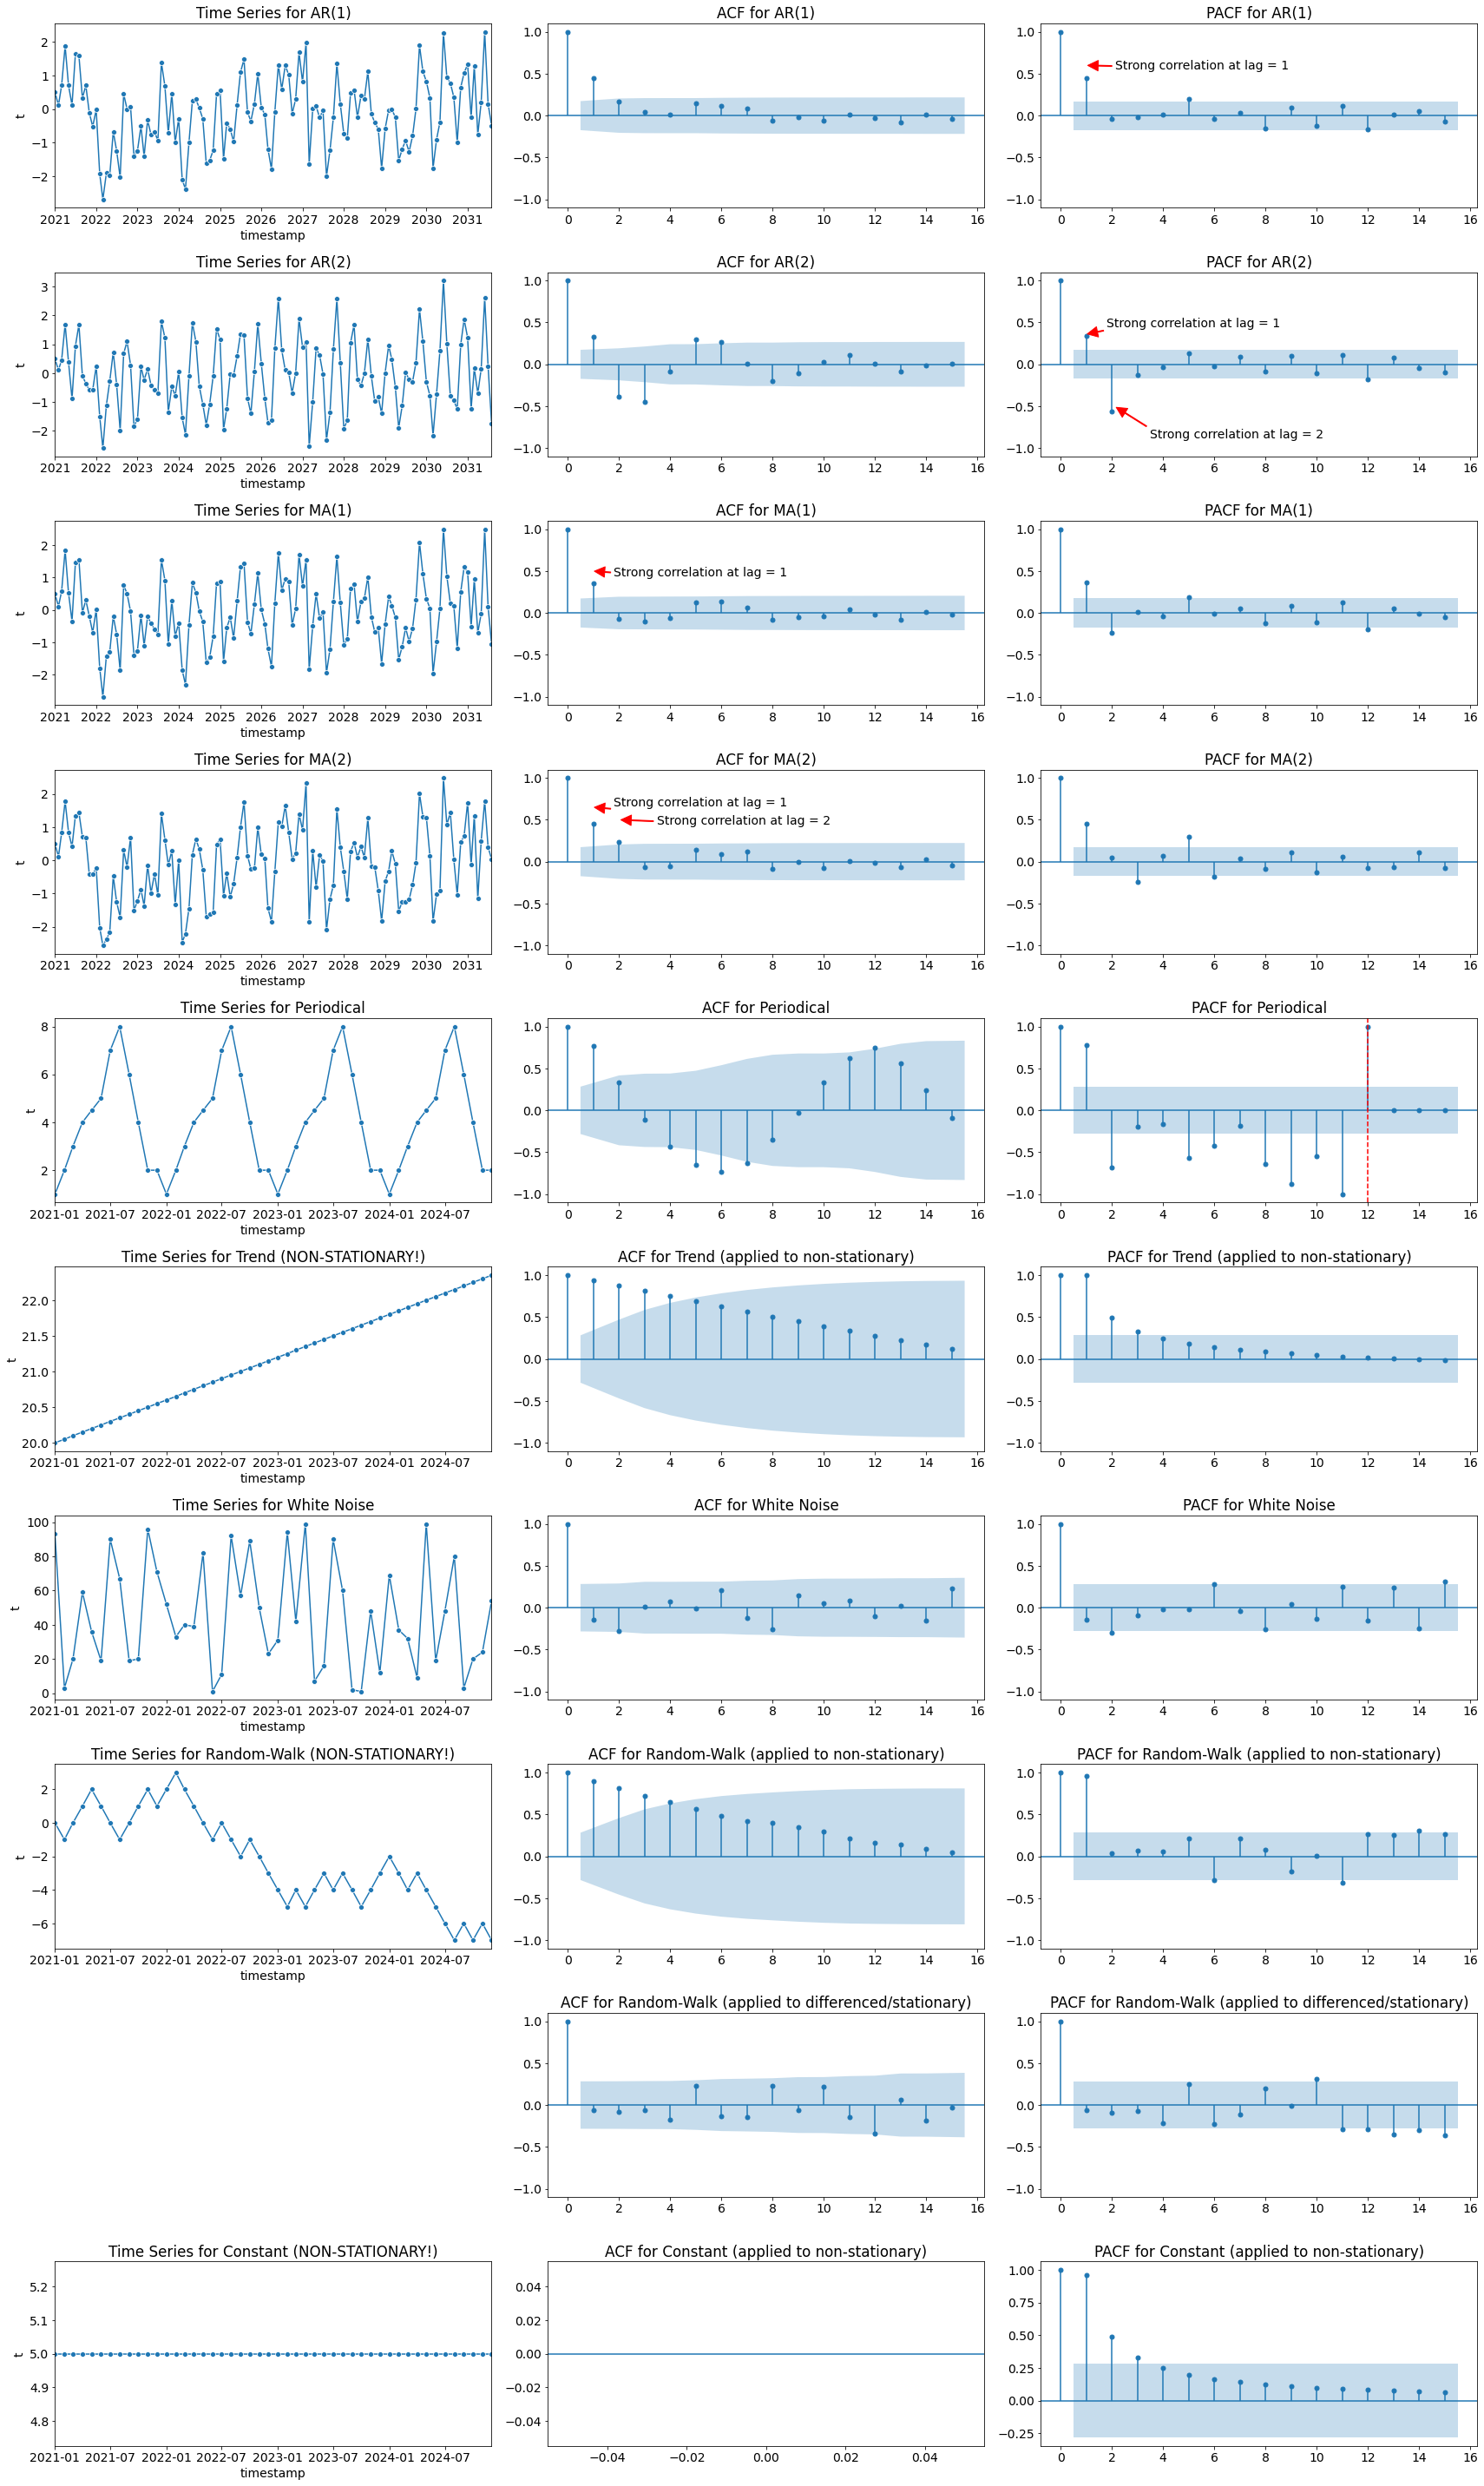